Carlos Garcia - 21000465

In [1]:
import cv2 
import numpy as np 
import math
import matplotlib.pyplot as plt

#### Obtener la imagen

In [2]:
def getImage(path):
    img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)  
    return img

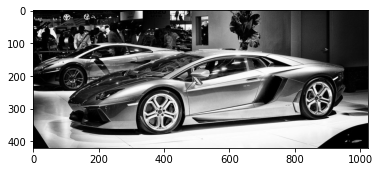

In [3]:
img = getImage('./imgs/carro.jpg')
plt.imshow(img, cmap = 'gray')

In [4]:
img.shape

(420, 1024)

#### Funciones

In [5]:
def convolutional_filter(imagen, kernel):
    alto = imagen.shape[0]
    ancho =  imagen.shape[1]
    
    altoKernel = len(kernel[:,0])
    anchoKernel = len(kernel[0,:])

    #parte entera del centro del kernel
    step = int(len(kernel[0,:])/2)
    newImg = np.zeros((alto, ancho, 1))
    
    for i in range(step, alto - step):
        newPixel = 0
        for j in range(step, ancho - step):
            ventana = imagen[i-step:i+2*step, j-step:j+2*step]
            newPixel = 0
            for m in range(0, altoKernel):
                for n in range(0, anchoKernel):
                    newPixel = newPixel + ventana[m, n] * kernel[m, n]
            newImg[i, j] = int(newPixel)
    
    return newImg

In [6]:
def derivadaX(img):
    height = img.shape[0]
    width = img.shape[1]
    dx = np.zeros_like(img)
    
    for i in range(0, height):
        for j in range(0, width-1):
            dx[i, j] = img[i, j+1] - img[i,j]
            
    return(dx) 

In [7]:
def derivadaY(img):
    height = img.shape[0]
    width = img.shape[1]
    dy = np.zeros_like(img)
    
    for i in range(0, height-1):
        for j in range(0, width):
            dy[i, j] = img[i+1, j] - img[i,j]
            
    return(dy)            

In [8]:
def getMagnitud(dx, dy):
    return np.sqrt(np.power(dx,2) + np.power(dy,2))

In [9]:
def getFase(dx, dy):
    height = dx.shape[0]
    width = dx.shape[1]
    fase = np.zeros_like(dx)
    
    for i in range(0, height):
        for j in range(0, width):
            fase[i, j] = math.degrees(math.atan2(dy[i,j], dx[i,j]))
            
    return(fase)     

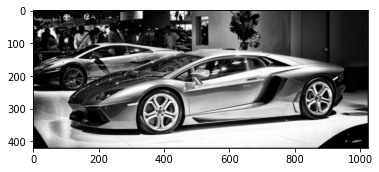

In [10]:
kernel = (1/16.) * np.array([[1,2,1], [2,4,2], [1,2,1]], dtype = 'float64') #gaussian-blur
img = convolutional_filter(img, kernel)
plt.imshow(img, cmap = 'gray')

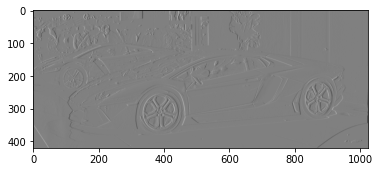

In [11]:
dx = derivadaX(img)
plt.imshow(dx, cmap = 'gray')

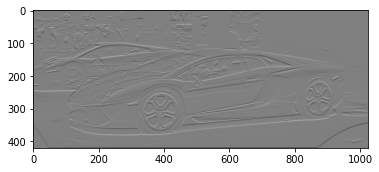

In [12]:
dy = derivadaY(img)
plt.imshow(dy, cmap = 'gray')

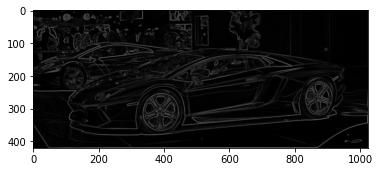

In [13]:
magnitud = getMagnitud(dx, dy)
plt.imshow(magnitud, cmap = 'gray')

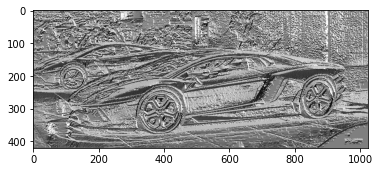

In [14]:
fase = getFase(dx, dy)
plt.imshow(fase, cmap = 'gray')

In [15]:
cv2.imwrite('./imgs/derivadaX.jpg', dx)
cv2.imwrite('./imgs/derivadaY.jpg', dy)
cv2.imwrite('./imgs/magnitud.jpg', magnitud)
cv2.imwrite('./imgs/fase.jpg', fase)

True

#### Non Maximum Suppression

In [16]:
def non_maximum_suppression(magImage, phaseImage):
    alto = magImage.shape[0]
    ancho =  magImage.shape[1]
    
    newImg = np.zeros((alto, ancho,1))
    val1 = 0
    val2 = 0
    val3 = 0
    alpha = 0.1
    for i in range(1, alto - 2):
        for j in range(1, ancho - 2):
            ventana = magImage[i-1:i+2, j-1:j+2]
            angulo = phaseImage[i, j]
            vDerecha = magImage[i - 1, j]
            vIzquierda = magImage[i + 1, j]
            if(((angulo > 337)  or (angulo <= 23)) or ((angulo >= 157) and (angulo <= 203))):
                val1 = ventana[1,0]
                val2 = ventana[1,1]
                val3 = ventana[1,2]
            elif(((angulo > 23) and (angulo <= 67)) or ((angulo > 203) and (angulo <= 248))):
                val1 = ventana[0,2]
                val2 = ventana[1,1]
                val3 = ventana[2,0]
            elif(((angulo > 67) and (angulo <= 113)) or ((angulo > 248) and (angulo <= 293))):
                val1 = ventana[0,1]
                val2 = ventana[1,1]
                val3 = ventana[2,1]
            elif(((angulo > 293) and (angulo <= 337)) or ((angulo > 113) and (angulo <= 157))):
                val1 = ventana[0,0]
                val2 = ventana[1,1]
                val3 = ventana[2,2]
            
            if((val2 >= val1) and (val2 >= val3)):
                newImg[i, j] = val2 
                #newImg[i,j] = alpha*val1 + (1-alpha)*val3
                #newImg[i, j] = 255
            else:
                newImg[i, j] = 0     
    return newImg


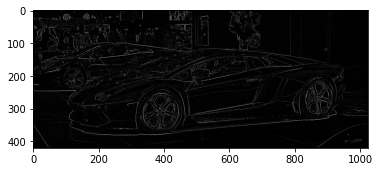

In [17]:
nms = non_maximum_suppression(magnitud, fase)
plt.imshow(nms, cmap = 'gray')

In [18]:
cv2.imwrite('./imgs/NMS.jpg', nms)

True

#### Threshold

In [19]:
def threshold(img, t):
    height = img.shape[0]
    width = img.shape[1]
    newImg = np.zeros((height, width, 1))
    
    for i in range(0, height):
        for j in range(0, width):
            if(img[i,j] > t):
                newImg[i,j] = 255
            else:
                newImg[i,j] = 0
                
    return newImg

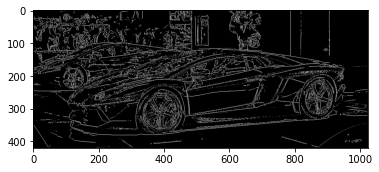

In [20]:
imgCanny = threshold(nms, 12)
plt.imshow(imgCanny, cmap = 'gray')

In [21]:
cv2.imwrite('./imgs/Canny.jpg', imgCanny)

True

#### Usando OpenCV

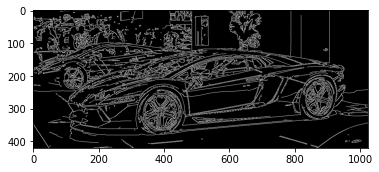

In [23]:
img = getImage('./imgs/carro.jpg')
edges = cv2.Canny(img, 100, 200)
plt.imshow(edges, cmap = 'gray')

In [24]:
cv2.imwrite('./imgs/OpenCV_Canny.jpg', edges)

True